# Clasificacion de ecos de radar con umbrales

## 1. Importamos las librerias necesarias

In [ ]:
# Este comando \\\"limpia\\\" todas las variables definidas (equivalente a clear all de Matlab)
%reset_selective -f b

# Este comando le indica a Python que las figuras se deben generar dentro de la misma Notebook, no en una ventana
%matplotlib inline

from matplotlib import pyplot as plt
from matplotlib import colors
import numpy as np
import glob
import pyart


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



## 2. Lectura de datos

In [ ]:
path_data = '/home/martin/Escritorio/TP5/material_TP5/data/invierno/'

FileList = np.sort(glob.glob(path_data+'*.nc'))
file2read=FileList[0]
print(file2read)

# Creamos el objeto "radar"
radar = pyart.io.read(file2read)
print(radar.fields.keys())

/home/martin/Escritorio/TP5/material_TP5/data/invierno/cfrad.20110718_120002.000_to_20110718_120422.001_ANG_v73_SUR.nc
[u'PhiDP', u'ZDR', u'dBZ', u'uPhiDP', u'RhoHV', u'KDP']


## 3. Extraccion de datos

In [ ]:
# SELECCIONAMOS LA ELEVACION A ANALIZAR
nelev=0

start_index = radar.sweep_start_ray_index['data'][nelev]
end_index   = radar.sweep_end_ray_index['data'][nelev]

rango  = radar.range['data']
tiempo = radar.time['data'][start_index:end_index]

# Datos de lat/lon
lats = radar.gate_latitude['data'][start_index:end_index]
lons = radar.gate_longitude['data'][start_index:end_index]

# Datos x/y (en metros)
xdist = radar.gate_x['data'][start_index:end_index]/1000.
ydist = radar.gate_y['data'][start_index:end_index]/1000.

# Variables radar
Zh     = radar.fields['dBZ']['data'][start_index:end_index, :]
Rho    = radar.fields['RhoHV']['data'][start_index:end_index, :]
Zdr    = radar.fields['ZDR']['data'][start_index:end_index, :]
uPhiDP = radar.fields['uPhiDP']['data'][start_index:end_index, :]
PhiDP  = radar.fields['PhiDP']['data'][start_index:end_index, :]
KDP    = radar.fields['KDP']['data'][start_index:end_index, :]


## 4. Visualizacion de datos: modo PPI

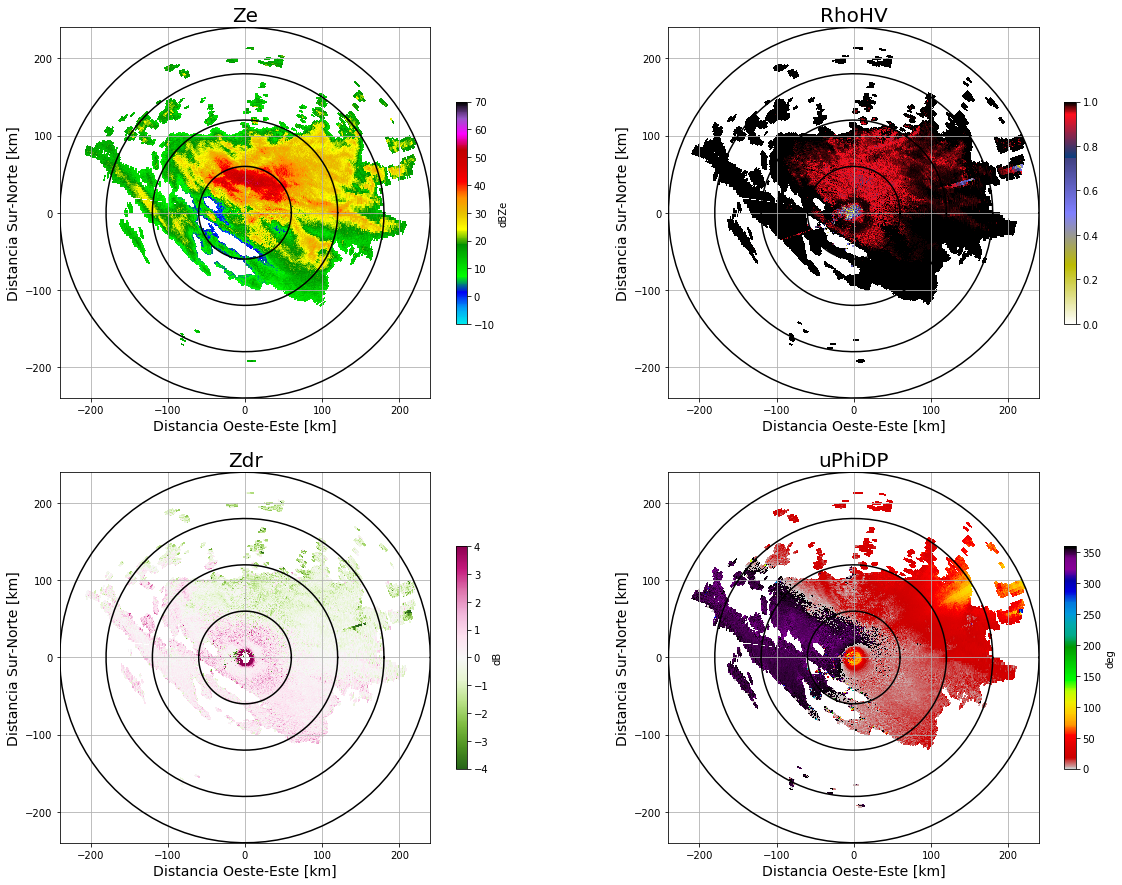

In [ ]:
fig = plt.figure(figsize=[20,15])

#===================================================================================#
# REFLECTIVIDAD HORIZONTAL
#===================================================================================#

fig.add_subplot(221, aspect=1)

# Graficamos la reflectividad
plt.pcolormesh(xdist, ydist, Zh, cmap=pyart.graph.cm.NWSRef, vmin=-10, vmax=70)
plt.colorbar(shrink=0.6, label='dBZe')

# Graficamos anillos concentricos de distancia (en este caso, cada 60 km)
for i in range(60,300,60):
    r = np.sqrt(i**2)
    theta = np.linspace(0, 2*np.pi, 100)
    x1 = r*np.cos(theta)
    x2 = r*np.sin(theta)
    plt.plot(x1, x2, '-k')

# Titulos de los ejes
plt.xlabel('Distancia Oeste-Este [km]', fontsize=14)
plt.ylabel('Distancia Sur-Norte [km]', fontsize=14)

# Titulo de la figura
plt.title('Ze', fontsize=20)

# Activamos el reticulado
plt.grid()

# Definimos limites eje X e Y
plt.xlim([-240,240])
plt.ylim([-240,240])

#===================================================================================#
# COEFICIENTE DE CORRELACION
#===================================================================================#

fig.add_subplot(222, aspect=1)

# Graficamos la reflectividad
plt.pcolormesh(xdist, ydist, Rho, cmap='gist_stern_r', vmin=0, vmax=1)
plt.colorbar(shrink=0.6)

# Graficamos anillos concentricos de distancia (en este caso, cada 60 km)
for i in range(60,300,60):
    r = np.sqrt(i**2)
    theta = np.linspace(0, 2*np.pi, 100)
    x1 = r*np.cos(theta)
    x2 = r*np.sin(theta)
    plt.plot(x1, x2, '-k')

# Titulos de los ejes
plt.xlabel('Distancia Oeste-Este [km]', fontsize=14)
plt.ylabel('Distancia Sur-Norte [km]', fontsize=14)

# Titulo de la figura
plt.title('RhoHV', fontsize=20)

# Activamos el reticulado
plt.grid()

# Definimos limites eje X e Y
plt.xlim([-240,240])
plt.ylim([-240,240])

#===================================================================================#
# REFLECTIVIDAD DIFERENCIAL
#===================================================================================#

fig.add_subplot(223, aspect=1)

# Graficamos la reflectividad
plt.pcolormesh(xdist, ydist, Zdr, cmap='PiYG_r', vmin=-4, vmax=4)
plt.colorbar(shrink=0.6, label='dB')

# Graficamos anillos concentricos de distancia (en este caso, cada 60 km)
for i in range(60,300,60):
    r = np.sqrt(i**2)
    theta = np.linspace(0, 2*np.pi, 100)
    x1 = r*np.cos(theta)
    x2 = r*np.sin(theta)
    plt.plot(x1, x2, '-k')

# Titulos de los ejes
plt.xlabel('Distancia Oeste-Este [km]', fontsize=14)
plt.ylabel('Distancia Sur-Norte [km]', fontsize=14)

# Titulo de la figura
plt.title('Zdr', fontsize=20)

# Activamos el reticulado
plt.grid()

# Definimos limites eje X e Y
plt.xlim([-240,240])
plt.ylim([-240,240])

#===================================================================================#
# DIFERENCIAL DE FASE
#===================================================================================#

fig.add_subplot(224, aspect=1)

# Graficamos la reflectividad
plt.pcolormesh(xdist, ydist, uPhiDP, cmap='spectral_r', vmin=0, vmax=360)
plt.colorbar(shrink=0.6, label='deg')

# Graficamos anillos concentricos de distancia (en este caso, cada 60 km)
for i in range(60,300,60):
    r = np.sqrt(i**2)
    theta = np.linspace(0, 2*np.pi, 100)
    x1 = r*np.cos(theta)
    x2 = r*np.sin(theta)
    plt.plot(x1, x2, '-k')

# Titulos de los ejes
plt.xlabel('Distancia Oeste-Este [km]', fontsize=14)
plt.ylabel('Distancia Sur-Norte [km]', fontsize=14)

# Titulo de la figura
plt.title('uPhiDP', fontsize=20)

# Activamos el reticulado
plt.grid()

# Definimos limites eje X e Y
plt.xlim([-240,240])
plt.ylim([-240,240])

#===================================================================================#
plt.savefig('../inviernovariable.png')
plt.show()


## 5. Diagramas de dispersion

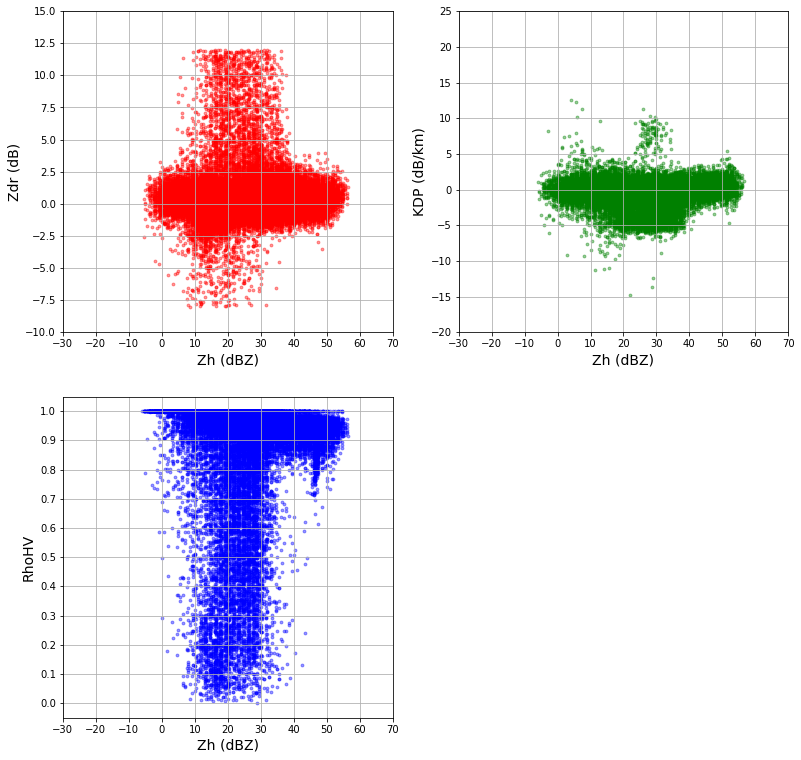

In [ ]:
fig = plt.figure(figsize=[13,13])

# Ze vs Zdr
fig.add_subplot(221)
plt.scatter(Zh, Zdr, color='r', s=8, marker='o', alpha=.4)
plt.xticks([-30,-20,-10,0,10,20,30,40,50,60,70], rotation='horizontal')
plt.yticks([-10,-7.5,-5,-2.5,0,2.5,5,7.5,10,12.5,15], rotation='horizontal')
plt.xlim([-30,70])
plt.ylim([-10, 15])
plt.grid()
plt.xlabel('Zh (dBZ)',fontsize=14)
plt.ylabel('Zdr (dB)',fontsize=14)

# Ze vs KDP
fig.add_subplot(222)
plt.scatter(Zh, KDP, color='g', s=8, marker='o', alpha=.4)
plt.xticks([-30,-20,-10,0,10,20,30,40,50,60,70], rotation='horizontal')
plt.yticks([-20,-15,-10,-5,0,5,10,15,20,25], rotation='horizontal')
plt.xlim([-30,70])
plt.ylim([-20,25])
plt.grid()
plt.xlabel('Zh (dBZ)',fontsize=14)
plt.ylabel('KDP (dB/km)',fontsize=14)

# Ze vs Rho
fig.add_subplot(223)
plt.scatter(Zh, Rho, color='b', s=8, marker='o', alpha=.4)
plt.xticks([-30,-20,-10,0,10,20,30,40,50,60,70], rotation='horizontal')
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1], rotation='horizontal')
plt.xlim([-30,70])
plt.ylim([-0.05, 1.05])
plt.grid()
plt.xlabel('Zh (dBZ)',fontsize=14)
plt.ylabel('RhoHV',fontsize=14)
plt.savefig('/home/martin/Escritorio/TP5/material_TP5/inviernoscatter.png')
plt.show()


## 6. Generacion de mascaras con condiciones: clasificacion logica booleana

In [ ]:
# EJEMPLO DE COMO GENERAR UNA MATRIZ CATEGORICA DE ACUERDO A CONDICIONES SOBRE DIFERENTES VARIABLES

# GENERO MATRIZ DE 0 Y 1 DONDE NO SE CUMPLE Y SI SE CUMPLE LA CONDICION, RESPECTIVAMENTE.

# MASCARA LLOVIZNA
mask_drizzle = (Rho > 0.975) & (Zh > -27.3) & (Zh < 30.8)
mask_drizzle = mask_drizzle.astype(int)

# MASCARA LLUVIA
mask_rain = (Rho > 0.975) & (Zh > 30.8) & (Zh < 58)
mask_rain = mask_rain.astype(int)
mask_rain[mask_rain==1]=2

# MASCARA GRANIZO
mask_hail = (Rho > 0.975) & (Zh > 58)
mask_hail = mask_hail.astype(int)
mask_hail[mask_hail==1]=3

# MASCARA CON TRES CATEGORIAS:
# 0: clutter (eco no meteorologico)
# 1: llovizna (drizzle)
# 2: lluvia (rain)
# 3: granizo (hail)
HID = mask_drizzle + mask_rain + mask_hail


### Graficamos los resultados:

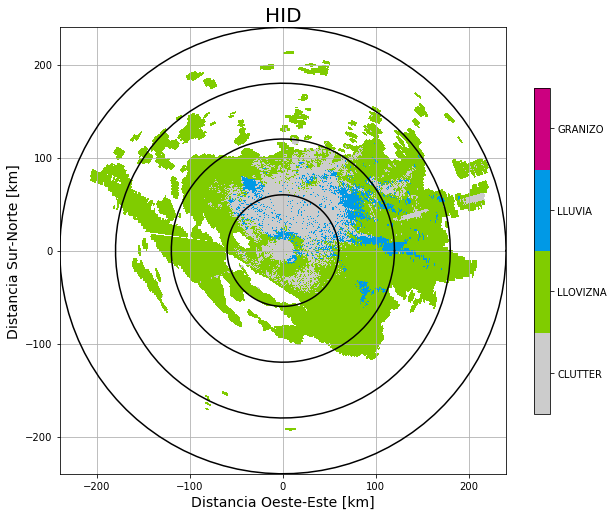

In [ ]:
fig = plt.figure(figsize=[10,10])

#===================================================================================#

fig.add_subplot(111, aspect=1)

# make a color map of fixed colors
cmap = colors.ListedColormap([[0.8,0.8,0.8], [0.5,0.8,0.0], [0.0,0.6,0.9], [0.8,0.0,0.5]])
bounds=[-0.5,0.5,1.5,2.5,3.5]
norm = colors.BoundaryNorm(bounds, cmap.N)

plt.pcolormesh(xdist, ydist, HID, cmap=cmap, norm=norm)
cbar=plt.colorbar(shrink=0.6)
cbar.set_ticks([0, 1, 2, 3])
cbar.set_ticklabels(['CLUTTER', 'LLOVIZNA', 'LLUVIA', 'GRANIZO'])

# Graficamos anillos concentricos de distancia (en este caso, cada 60 km)
for i in range(60,300,60):
    r = np.sqrt(i**2)
    theta = np.linspace(0, 2*np.pi, 100)
    x1 = r*np.cos(theta)
    x2 = r*np.sin(theta)
    plt.plot(x1, x2, '-k')

# Titulos de los ejes
plt.xlabel('Distancia Oeste-Este [km]', fontsize=14)
plt.ylabel('Distancia Sur-Norte [km]', fontsize=14)

# Titulo de la figura
plt.title('HID', fontsize=20)

# Activamos el reticulado
plt.grid()

# Definimos limites eje X e Y
plt.xlim([-240,240])
plt.ylim([-240,240])
plt.savefig('../inviernofuzzy.png')
plt.show()
